In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [57]:
#implement Kmeans
def Kmeans(centroids_list, K ,data):
    cost_list = []
    for rounds in range(0,20):
        #initializations
        new_clusters_list=[]
        k_cluster=[]
        total_cost = 0
        cluster_centroid = []
        #find the closest centroid for each xi
        for i in range(0,500):
            distance_list = []
            for centroid in centroids_list:
                distance = np.sum((data[i]-centroid)**2)
                distance_list.append(distance)
                nearest_cluster = min(distance_list)
                new_cluster = distance_list.index(nearest_cluster)
            new_clusters_list.append(new_cluster)
        #new K clusters
        
        for index in range(0,K):
            cluster = data[np.array(new_clusters_list)==index,:]
            k_cluster.append(cluster)
            
        #new Centroids
        for item in range(0,K):
            cluster_mean = np.average(k_cluster[item],axis=0)
            cluster_centroid.append(cluster_mean)
            
            cost = np.sum((k_cluster[item]-centroids_list[item])**2)
            total_cost = total_cost + cost
            

        cost_list.append(total_cost)
        centroids_list = cluster_centroid
    return cost_list, k_cluster
        


In [61]:
#generate 500 observations with mixing weights
start = np.random.randint(0,501,size=5)
data1 = np.random.multivariate_normal(np.array([0,0]),np.matrix([[1,0],[0,1]]),500)
data2 = np.random.multivariate_normal(np.array([3,0]),np.matrix([[1,0],[0,1]]),500)
data3 = np.random.multivariate_normal(np.array([0,3]),np.matrix([[1,0],[0,1]]),500)
data_pi = np.random.choice(range(3),500,p=[0.2,0.5,0.3])
dataset = np.concatenate((data1[data_pi==0,:],
                       data2[data_pi==1,:],
                       data3[data_pi==2,:] ))

In [62]:

K_2 = (dataset[start[0]],dataset[start[1]])
K_3 = (dataset[start[0]],dataset[start[1]],dataset[start[2]])
K_4 = (dataset[start[0]],dataset[start[1]],dataset[start[2]],dataset[start[3]])
K_5 = (dataset[start[0]],dataset[start[1]],dataset[start[2]],dataset[start[3]],dataset[start[4]])


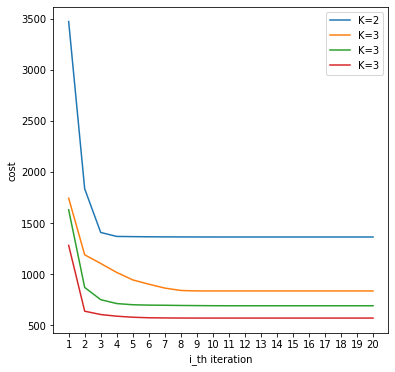

In [73]:
cost_2, Kcluster_2 = Kmeans(K_2,2,dataset)
cost_3, Kcluster_3 = Kmeans(K_3,3,dataset)
cost_4, Kcluster_4 = Kmeans(K_4,4,dataset)
cost_5, Kcluster_5 = Kmeans(K_5,5,dataset)
plt.figure(figsize=(6,6))
plt.xticks(np.arange(1,21))
plt.xlabel('i_th iteration')
plt.ylabel('cost')
plt.plot(np.arange(1,21),cost_2,label='K=2')
plt.plot(np.arange(1,21),cost_3,label='K=3')
plt.plot(np.arange(1,21),cost_4,label='K=3')
plt.plot(np.arange(1,21),cost_5,label='K=3')
plt.legend()

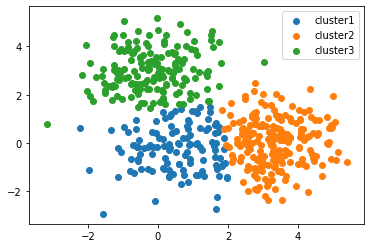

In [80]:
cluster1=pd.DataFrame(Kcluster_3[0])
cluster2=pd.DataFrame(Kcluster_3[1])
cluster3=pd.DataFrame(Kcluster_3[2])
x1,y1 = cluster1[0].tolist(),cluster1[1].tolist()
x2,y2 = cluster2[0].tolist(),cluster2[1].tolist()
x3,y3 = cluster3[0].tolist(),cluster3[1].tolist()
plt.scatter(x1,y1,label='cluster1')
plt.scatter(x2,y2,label='cluster2')
plt.scatter(x3,y3,label='cluster3')
plt.legend()



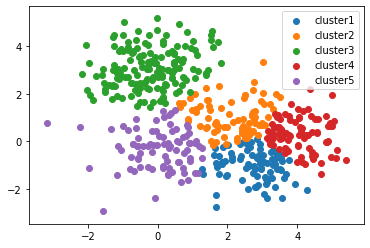

In [82]:
cluster1=pd.DataFrame(Kcluster_5[0])
cluster2=pd.DataFrame(Kcluster_5[1])
cluster3=pd.DataFrame(Kcluster_5[2])
cluster4=pd.DataFrame(Kcluster_5[3])
cluster5=pd.DataFrame(Kcluster_5[4])
x1,y1 = cluster1[0].tolist(),cluster1[1].tolist()
x2,y2 = cluster2[0].tolist(),cluster2[1].tolist()
x3,y3 = cluster3[0].tolist(),cluster3[1].tolist()
x4,y4 = cluster4[0].tolist(),cluster4[1].tolist()
x5,y5 = cluster5[0].tolist(),cluster5[1].tolist()
plt.scatter(x1,y1,label='cluster1')
plt.scatter(x2,y2,label='cluster2')
plt.scatter(x3,y3,label='cluster3')
plt.scatter(x4,y4,label='cluster4')
plt.scatter(x5,y5,label='cluster5')
plt.legend()

In [83]:
X_train = pd.read_csv('Prob2_Xtrain.csv', header=None)
y_train = pd.read_csv('Prob2_ytrain.csv', header=None)
X_test = pd.read_csv('Prob2_Xtest.csv', header=None)
y_test = pd.read_csv('Prob2_ytest.csv', header=None)

In [84]:
X_train.head()

,0,1,2,3,4,5,6,7,8,9
0,-0.042985,0.402080,0.060133,0.008235,-0.011964,0.017788,0.004096,-0.041283,-0.018114,0.003424
1,-0.021163,0.197970,0.023161,0.000774,-0.000446,0.037280,0.002865,-0.012920,0.027745,-0.013744
2,-0.033537,0.307060,0.048742,0.011210,0.029054,-0.073224,-0.007833,-0.069956,-0.021547,-0.010270
3,-0.033537,0.307060,0.048742,0.011210,0.029054,-0.073224,-0.007833,-0.069956,-0.021547,-0.010270
4,-0.003041,0.028877,-0.000203,-0.003211,-0.005451,0.034991,0.003081,0.005470,0.026079,-0.018609
